In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**6. In this exercise, you will further analyze the Wage data set considered
throughout this chapter.
(a) Perform polynomial regression to predict wage using age . Use
cross-validation to select the optimal degree d for the polyno-
mial. What degree was chosen, and how does this compare to
the results of hypothesis testing using ANOVA? Make a plot of
the resulting polynomial fit to the data.**

In [3]:
Wage = pd.read_csv("data/Wage.csv")
Wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


**交叉验证法**

In [4]:
from sklearn.model_selection import KFold
#编写函数便于生成MSR，也可以使用GridSearchCV，这里为了使用anova方便
def model_msr(data,ols_model,dmatrices_model,n_splits):
    kf = KFold(n_splits=n_splits, random_state=1,shuffle=True)
    kf.get_n_splits(data)
    msr = []
    for train_index, test_index in kf.split(data):
        results = smf.ols(ols_model , data = data.iloc[train_index]).fit()
        y_test ,X_test = patsy.dmatrices(dmatrices_model,data.iloc[test_index], return_type="dataframe")
        predict_test  = results.predict(data.iloc[test_index])
        msr.append(((np.c_[y_test].ravel() - predict_test)**2).mean())
    return np.array(msr)
#这里使用的是非poly函数的正交基
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly
msr_list = []
for degree in range(1,11):
    ols_model = 'wage ~ {}'.format(patsy_model_poly('age',degree))
    dmatrices_model = 'wage ~ age'
    msr_list.append(model_msr(Wage,ols_model,dmatrices_model,10).mean())

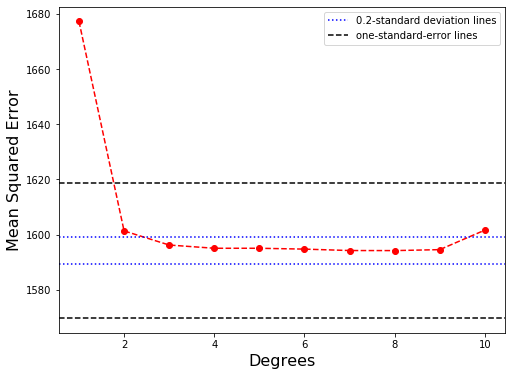

In [5]:
#如果直接使用最小则会产生过拟合的情况，故采用0.2-standard deviation或one-standard-error原则（原理参考6.1.3选择最优模型）
msr_array = np.array(msr_list) 
plt.figure(figsize=(8,6))
plt.plot(range(1,11),msr_list,'r--o')
plt.xlabel('Degrees',fontsize=16)
plt.ylabel('Mean Squared Error',fontsize=16)
plt.axhline(msr_array.min() + msr_array.std() * 0.2,color = 'b',linestyle = ':',label = '0.2-standard deviation lines')
plt.axhline(msr_array.min() - msr_array.std() * 0.2,color = 'b',linestyle = ':')
plt.axhline(msr_array.min() + msr_array.std() * 1,color = 'black',linestyle = '--',label = 'one-standard-error lines')
plt.axhline(msr_array.min() - msr_array.std() * 1,color = 'black',linestyle = '--')
plt.legend()
plt.show()

In [6]:
print('直接取最小值degree为:' , np.argmin(msr_array) + 1)
print('直接取最小值degree为:' , msr_list.index(min(msr_list)) + 1 )

直接取最小值degree为: 8
直接取最小值degree为: 8


one-standard-error选择degree= 2,使用0.2-standard deviation选择degree= 3，最小值为degree= 8

**ANOVO方法**

In [7]:
fit_1 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',1)),data = Wage).fit()
fit_2 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',2)),data = Wage).fit()
fit_3 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_4 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',4)),data = Wage).fit()
fit_5 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',5)),data = Wage).fit()
fit_6 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',6)),data = Wage).fit()
fit_7 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',7)),data = Wage).fit()
fit_8 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',8)),data = Wage).fit()
fit_9 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',9)),data = Wage).fit()
fit_10 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',10)),data = Wage).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4,fit_5,fit_6,fit_7,fit_8,fit_9,fit_10, typ=1)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.234621,2.808147e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.864068,1.701808e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.800302,5.133655e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.802966,3.702800e-01
5,2993.0,4.766389e+06,1.0,3932.256955,2.461843,1.167475e-01
6,2993.0,4.764599e+06,-0.0,1790.497340,-inf,NaN
7,2993.0,4.764136e+06,-0.0,462.456029,-inf,NaN
8,2993.0,4.764981e+06,-0.0,-844.265880,inf,NaN
9,2993.0,4.780664e+06,-0.0,-15682.771784,inf,NaN


p值小于0.01的模型为degree = 3

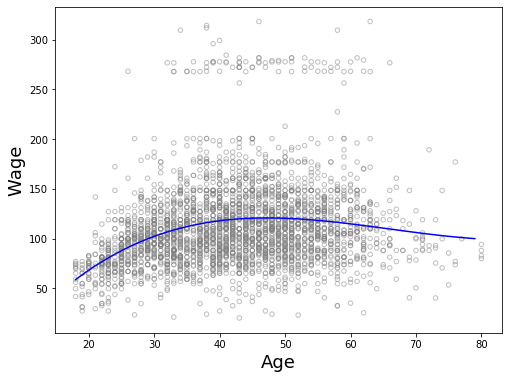

In [8]:
agelims = np.arange(Wage['age'].min(),Wage['age'].max())
age_grid  = pd.DataFrame(agelims,columns = ['age'])
preds = fit_3.predict(age_grid)
plt.figure(figsize=(8,6))
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.5)
plt.plot(agelims,preds,'b')
plt.xlabel('Age',fontsize=18)
plt.ylabel('Wage',fontsize=18)
plt.show()

**(b) Fit a step function to predict wage using age , and perform cross-
validation to choose the optimal number of cuts. Make a plot of
the fit obtained.**

In [9]:
Wage_cut = Wage.copy()
msr_cut_list = []
def model_msr(data,ols_model,dmatrices_model,n_splits):
    kf = KFold(n_splits=n_splits, random_state=1,shuffle=True)
    kf.get_n_splits(data)
    msr = []
    for train_index, test_index in kf.split(data):
        results = smf.ols(ols_model , data = data.iloc[train_index]).fit()
        y_test ,X_test = patsy.dmatrices(dmatrices_model,data.iloc[test_index], return_type="dataframe")
        predict_test  = results.predict(data.iloc[test_index])
        msr.append(((np.c_[y_test].ravel() - predict_test)**2).mean())
    return np.array(msr)
for cut_num in range(1,21):
    Wage_cut['age_cut'] = pd.cut(Wage['age'],cut_num)
    ols_model = 'wage ~ age_cut'
    dmatrices_model = 'wage ~ age_cut'
    msr_cut_list.append(model_msr(Wage_cut,ols_model,dmatrices_model,10).mean())

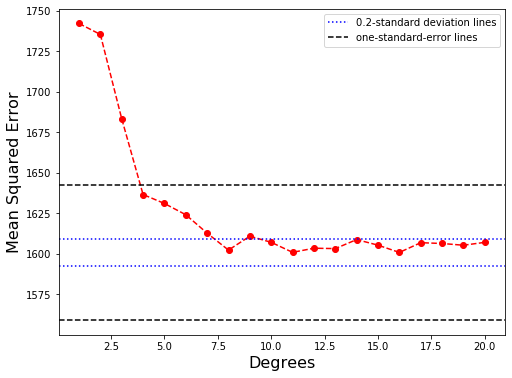

In [10]:
#如果直接使用最小则会产生过拟合的情况，故采用0.2-standard deviation或one-standard-error原则（原理参考6.1.3选择最优模型）
msr_cut_array = np.array(msr_cut_list) 
plt.figure(figsize=(8,6))
plt.plot(range(1,21),msr_cut_list,'r--o')
plt.xlabel('Degrees',fontsize=16)
plt.ylabel('Mean Squared Error',fontsize=16)
plt.axhline(msr_cut_array.min() + msr_cut_array.std() * 0.2,color = 'b',linestyle = ':',label = '0.2-standard deviation lines')
plt.axhline(msr_cut_array.min() - msr_cut_array.std() * 0.2,color = 'b',linestyle = ':')
plt.axhline(msr_cut_array.min() + msr_cut_array.std() * 1,color = 'black',linestyle = '--',label = 'one-standard-error lines')
plt.axhline(msr_cut_array.min() - msr_cut_array.std() * 1,color = 'black',linestyle = '--')
plt.legend()
plt.show()

In [11]:
print('直接取最小值cut_num为:' , np.argmin(msr_cut_array) + 1)
print('直接取最小值cut_num为:' , msr_cut_list.index(min(msr_cut_list)) + 1 )

直接取最小值cut_num为: 16
直接取最小值cut_num为: 16


one-standard-error选择cut_num= 4,使用0.2-standard deviation选择cut_num= 8，最小值为cut_num= 8

In [12]:
fit_cut_list = []
for cut_num in range(1,11):
    Wage_cut['age_cut'] = pd.cut(Wage['age'],cut_num)
    fit_cut = smf.ols('wage ~ age_cut',data = Wage_cut).fit()
    fit_cut_list.append(fit_cut)
sm.stats.anova_lm(fit_cut_list[0],fit_cut_list[1],fit_cut_list[2],fit_cut_list[3],fit_cut_list[4],
                  fit_cut_list[5],fit_cut_list[6],fit_cut_list[7],fit_cut_list[8],fit_cut_list[9])

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2999.0,5.222086e+06,0.0,NaN,NaN,NaN
1,2998.0,5.195128e+06,1.0,26957.985619,16.844217,4.165882e-05
2,2997.0,5.037846e+06,1.0,157281.957700,98.274828,8.141211e-23
3,2996.0,4.895717e+06,1.0,142128.387609,88.806390,8.423374e-21
4,2995.0,4.879628e+06,1.0,16089.614664,10.053309,1.536103e-03
5,2994.0,4.851973e+06,1.0,27654.719110,17.279558,3.316870e-05
6,2993.0,4.813508e+06,1.0,38465.179499,24.034282,9.967989e-07
7,2992.0,4.779946e+06,1.0,33561.930822,20.970574,4.854289e-06
8,2991.0,4.804830e+06,1.0,-24883.817765,-15.548210,1.000000e+00
9,2990.0,4.785285e+06,1.0,19544.867652,12.212262,4.816622e-04


p值小于0.01的模型为age_cut = 8

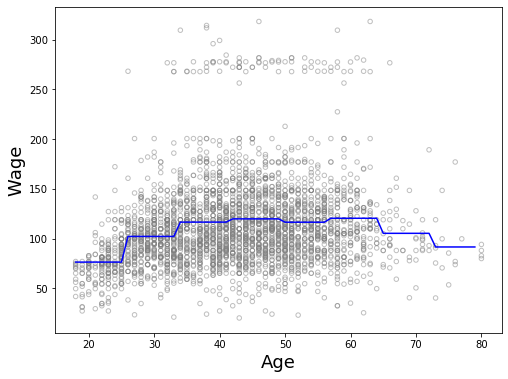

In [13]:
Wage_cut['age_cut'] = pd.cut(Wage['age'],8)
agelims_cut = pd.cut(agelims,Wage_cut['age_cut'].values.categories)
age_grid_cut  = pd.DataFrame(agelims_cut,columns = ['age_cut'])
preds = fit_cut_list[7].predict(age_grid_cut)
plt.figure(figsize=(8,6))
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.5)
plt.plot(agelims,preds,'b')
plt.xlabel('Age',fontsize=18)
plt.ylabel('Wage',fontsize=18)
plt.show()